In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Task 1: Clean and Preprocess data 

## Task 1.1: Merge 12-month data 

In [4]:
path='./'
frames=[] 
all_length=[] 
for file in os.listdir(path):
    if file.startswith('sales2019_') and file.endswith('.csv'):
        filepath = path + file 
        df1=pd.read_csv(filepath)
        frames.append(df1) 
        result=pd.concat(frames) 
        length_1month=len(df1.index) 
        all_length.append(length_1month)
df=result 
df.to_csv('annualSales2019.csv',index=False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


## Task 1.2: Add 'Month' column  

In [6]:
df['Month']=df['Order Date'].str[0:2] 
df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [7]:
print(set(df['Month']))

{'12', '07', '01', '09', '02', '04', '03', '05', nan, '11', '06', 'Or', '10', '08'}


## Task 1.3: Get rid of 'NaN' and 'Or' value 

In [9]:
# Loại bỏ NaN 
df=df.dropna(how='all') 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [10]:
df=df[df['Month']!= 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


# Task 2: Reporting 

## Task 2.1: What was the best month for sales? How much was earned that month?

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 12010
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [14]:
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'],downcast ='integer')
df['Price Each']=pd.to_numeric(df['Price Each'],downcast = 'float')

In [15]:
df['Sales']=df['Quantity Ordered']* df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


In [16]:
moving_column=df.pop('Sales') 
df.insert(4,'Sales', moving_column)
df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [17]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [18]:
sales_value=df.groupby('Month').sum()['Sales'] 
sales_value.max()  

4613443.5

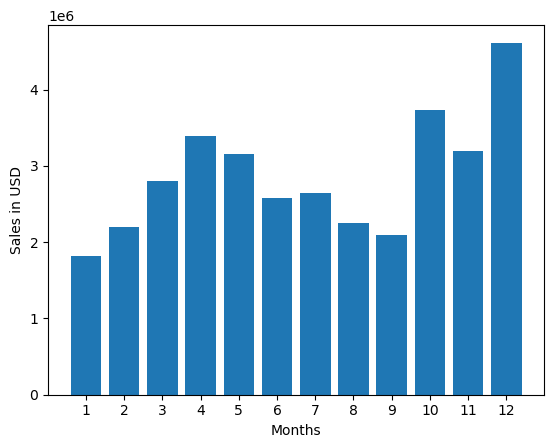

In [19]:
months = range(1,13)
plt.bar(x=months, height=sales_value) 
plt.xticks(months) 
plt.xlabel("Months") 
plt.ylabel('Sales in USD') 
plt.show()

## Task 2.2: What city has the best sales?

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [22]:
address_to_city = lambda address:address.split(',')[1]  

In [23]:
df['City']= df['Purchase Address'].apply(address_to_city)
df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [24]:
df.groupby('City').sum()['Sales']

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [25]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max() 

8262204.0

In [26]:
cities = [city for city, sales in sales_value_city.items()]
print(cities) 

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


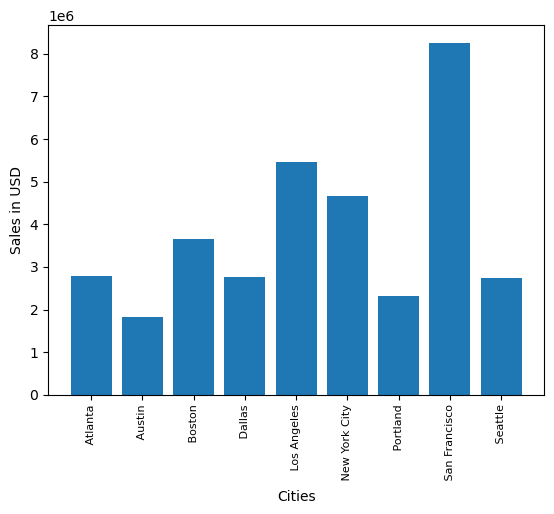

In [27]:
plt.bar(x=cities, height=sales_value_city) 
plt.xticks(cities,rotation=90,size=8) 
plt.xlabel("Cities") 
plt.ylabel('Sales in USD') 
plt.show()

## Task 2.3: What time should we display ads to maximize the likelihood of customer's buying product 

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [31]:
df['Order Date']=pd.to_datetime(df['Order Date'],format="mixed")

In [33]:
df['Hours']=df['Order Date'].dt.hour 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


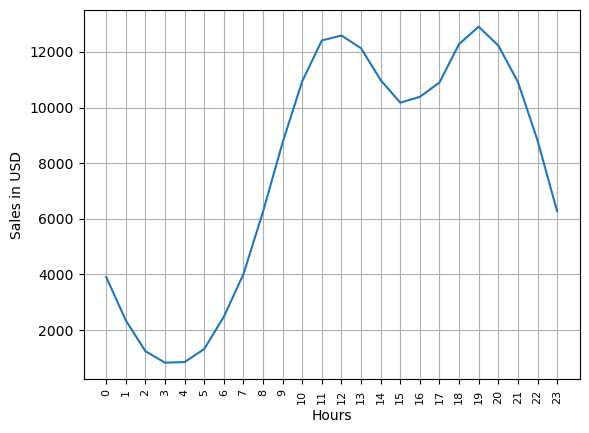

In [35]:
# Tổng đơn hàng được đặt theo khung giờ 
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()] 
plt.plot(hours,sales_value_hours) 
plt.grid()
plt.xticks(hours,rotation=90,size=8) 
plt.xlabel("Hours") 
plt.ylabel('Sales in USD') 
plt.show()

## Task 2.4: What products are most often sold together?

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [39]:
df_dup=df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2


In [41]:
df_dup['All Products']=df_dup.groupby('Order ID')['Product'].transform(', '.join) 
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"


In [42]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates() 

In [45]:
df_dup 

,Order ID,All Products
0,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,"iPhone, Lightning Charging Cable"
60,162066,"AA Batteries (4-pack), USB-C Charging Cable"
66,162071,"Vareebadd Phone, USB-C Charging Cable"
78,162082,"Vareebadd Phone, Wired Headphones"
...,...,...
11908,248053,"AA Batteries (4-pack), 20in Monitor"
11924,248068,"Bose SoundSport Headphones, AA Batteries (4-pack)"
11945,248088,"ThinkPad Laptop, Bose SoundSport Headphones"
11963,248105,"Google Phone, Wired Headphones"


In [47]:
df_dup['All Products'].value_counts().head(10)

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

## Task 3.5: What product sold the most? Why do you think it sold the most?

In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 12010
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int8          
 3   Price Each        185950 non-null  float32       
 4   Sales             185950 non-null  float32       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  object        
 8   City              185950 non-null  object        
 9   Hours             185950 non-null  int32         
dtypes: datetime64[ns](1), float32(2), int32(1), int8(1), object(5)
memory usage: 12.2+ MB


In [54]:
all_products = df.groupby('Product')['Quantity Ordered'].sum()
all_products 

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [63]:
prices = df.groupby('Product')['Price Each'].mean()
prices 

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

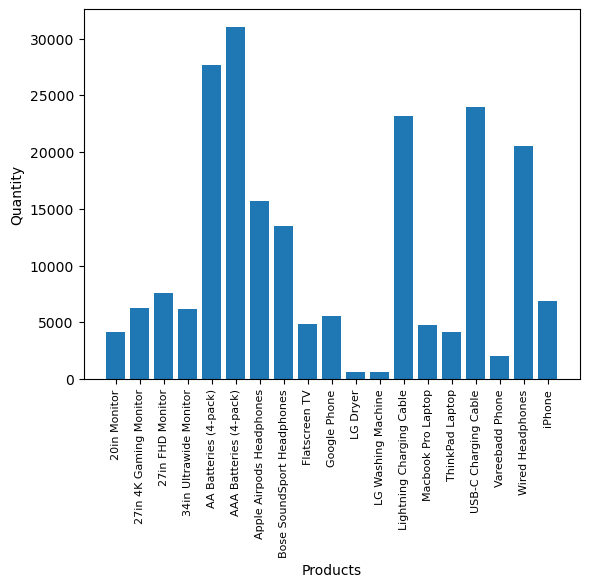

In [65]:
products_list = [product for product,quant in all_products.items()] 
plt.bar(products_list,all_products) 
plt.xticks(products_list,rotation=90,size=8) 
plt.xlabel("Products") 
plt.ylabel('Quantity') 
plt.show()

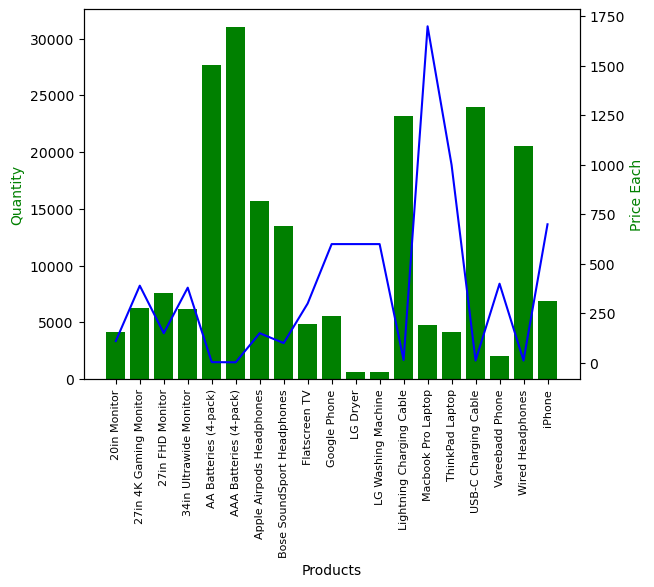

In [75]:
# giá có ảnh hưởng thế nào 
x = products_list
y1= all_products 
y2 = prices 

fig,ax1 = plt.subplots() 

ax2 = ax1.twinx() 
ax1.bar(x,y1,color='g') 
ax2.plot(x,y2,'b-') 

ax1.set_xticklabels(products_list,rotation = 90, size=8)
ax1.set_xlabel('Products') 
ax1.set_ylabel('Quantity',color='g')
ax2.set_ylabel('Price Each',color='g')

plt.show()